**Student Performance**

 Step 1: Project Description

This project explores a dataset of student performance in exams,
aiming to understand which factors (like gender, parental education,
test preparation, etc.) affect students' math, reading, and writing scores.

We'll use Exploratory Data Analysis (EDA) to uncover patterns,
relationships, and outliers using visual and statistical techniques.


 Step 2: Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set(style="whitegrid")

Step 3: Load Dataset , Data Preprocessing & Cleaning

In [3]:
df = pd.read_csv("StudentsPerformance.csv")
display(df.head())


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Handle missing values:

In [5]:
df.isnull().sum()
df.dropna(inplace=True)

Remove duplicates:




In [6]:
df.drop_duplicates(inplace=True)


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


step 4: Exploratory Data Analysis (EDA)

  Perform exploratory analysis using Pandas, Matplotlib, and Seaborn.

We analyze the distribution of math, reading, and writing scores
using histograms and boxplots to detect skewness or outliers.

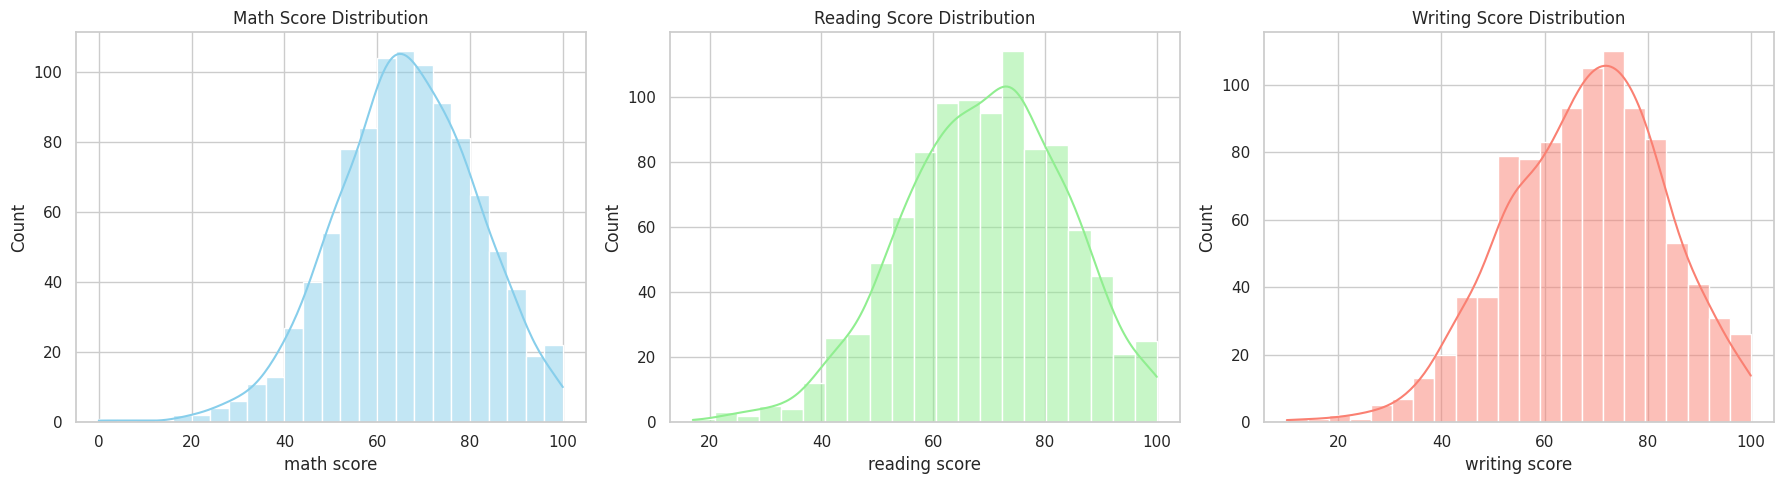

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['math score'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Math Score Distribution')
sns.histplot(df['reading score'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Reading Score Distribution')
sns.histplot(df['writing score'], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Writing Score Distribution')
plt.tight_layout()
plt.show()

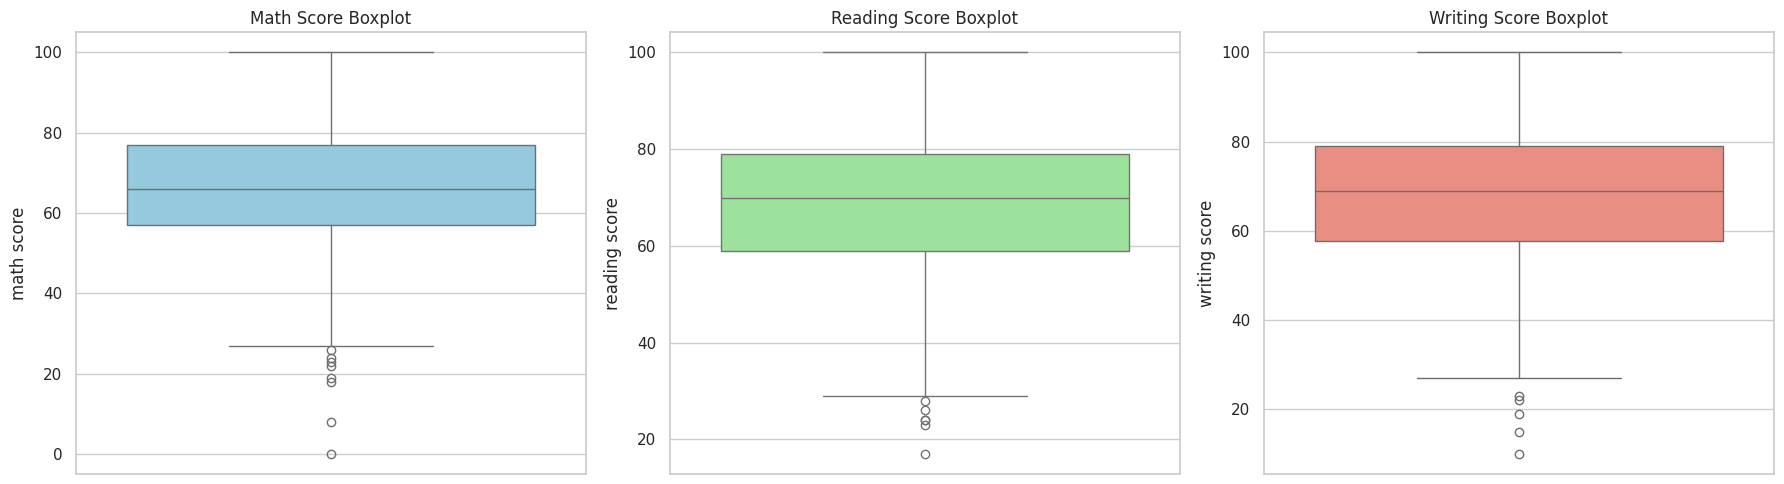

In [9]:
# Boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df['math score'], ax=axes[0], color='skyblue')
axes[0].set_title('Math Score Boxplot')
sns.boxplot(y=df['reading score'], ax=axes[1], color='lightgreen')
axes[1].set_title('Reading Score Boxplot')
sns.boxplot(y=df['writing score'], ax=axes[2], color='salmon')
axes[2].set_title('Writing Score Boxplot')
plt.tight_layout()
plt.show()

We'll use barplots to analyze average scores based on gender,
parental education, test preparation, and lunch type.

<ipython-input-10-2331262866>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='math score', ci=None)


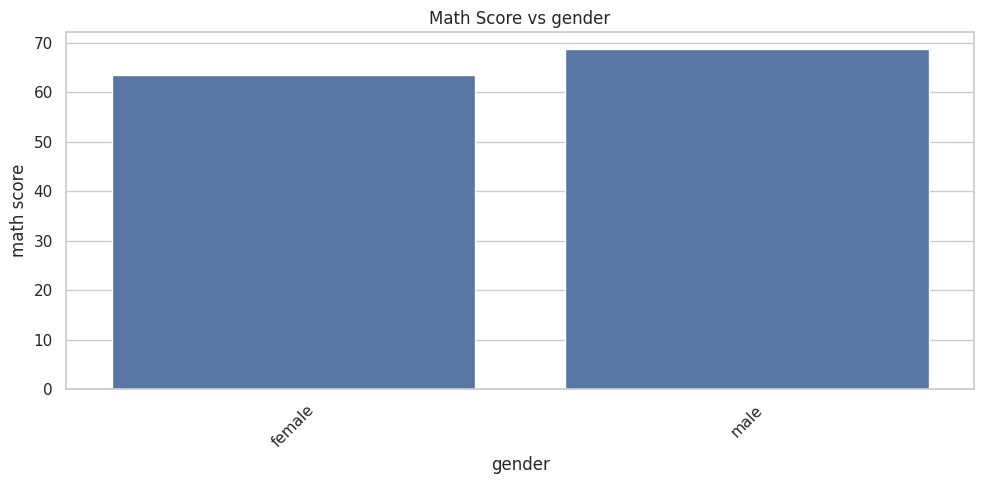

<ipython-input-10-2331262866>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='math score', ci=None)


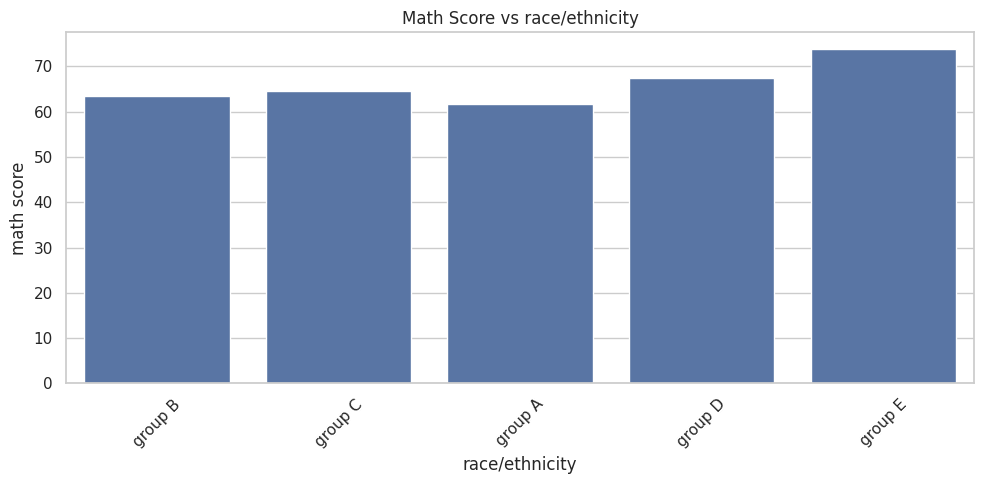

<ipython-input-10-2331262866>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='math score', ci=None)


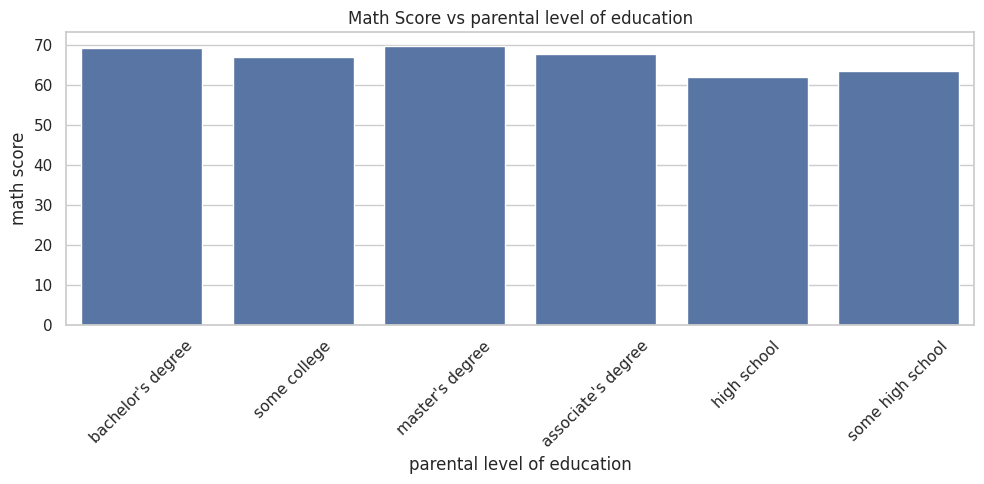

<ipython-input-10-2331262866>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='math score', ci=None)


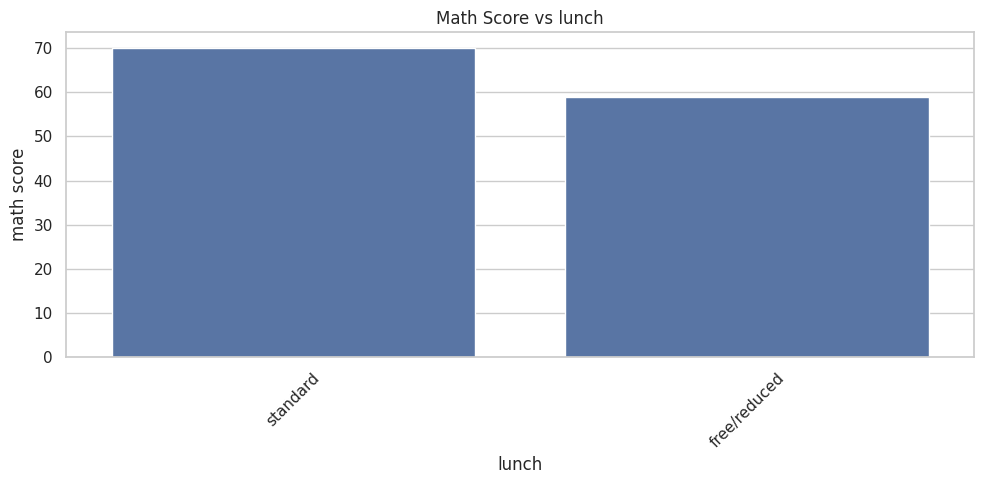

<ipython-input-10-2331262866>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='math score', ci=None)


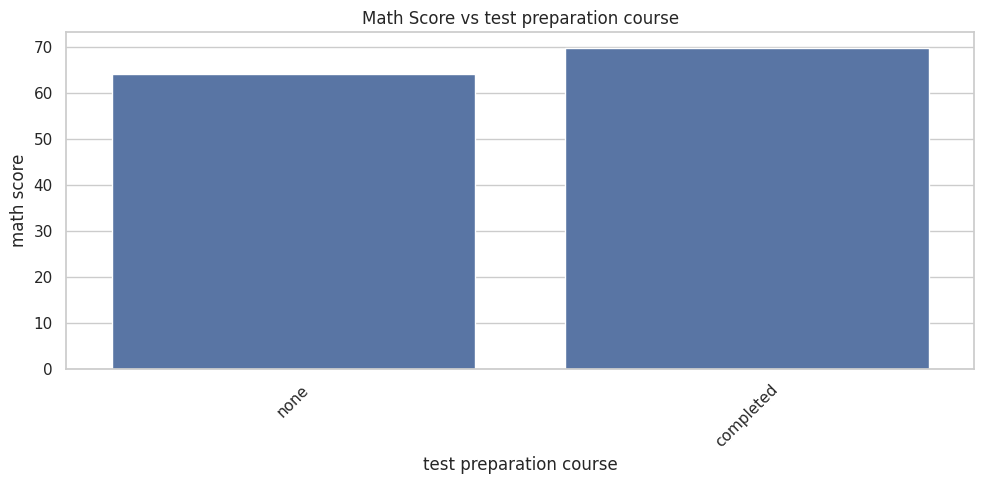

In [10]:
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
scores = ['math score', 'reading score', 'writing score']

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=col, y='math score', ci=None)
    plt.xticks(rotation=45)
    plt.title(f'Math Score vs {col}')
    plt.tight_layout()
    plt.show()

Check correlation between numerical features (math, reading, writing scores).

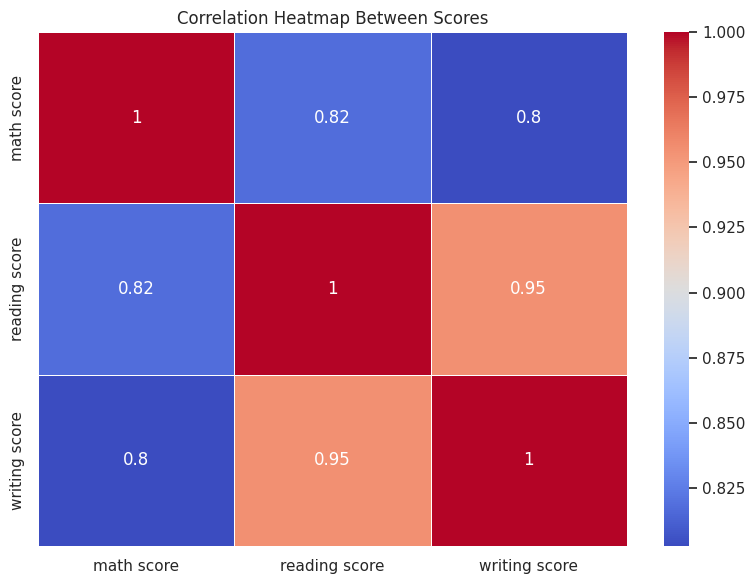

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[scores].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Between Scores')
plt.tight_layout()
plt.show()

Create a total score and percentage, then analyze top performers

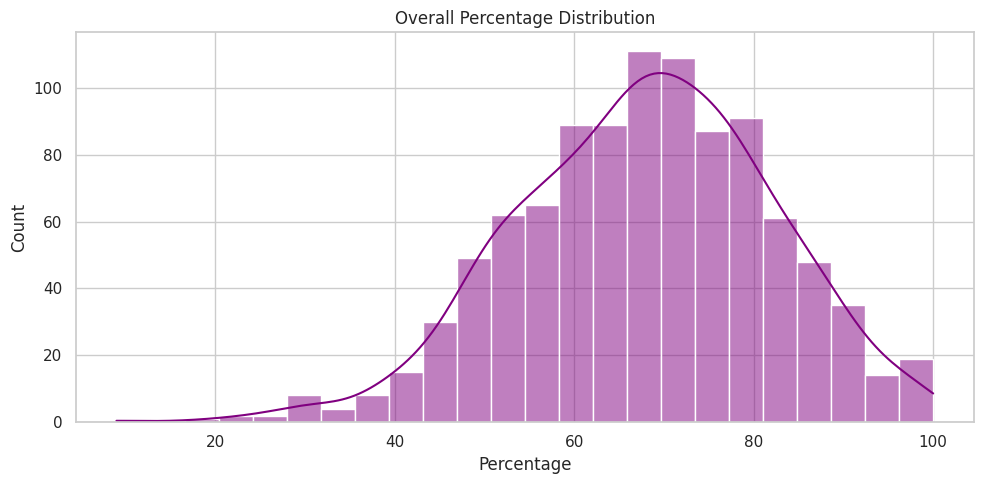

In [12]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['percentage'] = df['total_score'] / 3

plt.figure(figsize=(10, 5))
sns.histplot(df['percentage'], kde=True, color='purple')
plt.title('Overall Percentage Distribution')
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()

Export Processed Data (If Needed)

  Save your cleaned dataset:

In [14]:
df.to_csv("cleaned_Student_data.csv", index=False)

 **Conclusion**

- Students who completed test preparation scored significantly higher.
- Parental education and lunch type have a clear influence on performance.
- Scores across math, reading, and writing are strongly correlated.
- Overall, understanding demographics can help in personalized educational strategies.